[ WARN:0@49607.066] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/k.sakamoto/Desktop/投下1回目_log/img/image029.jpg'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

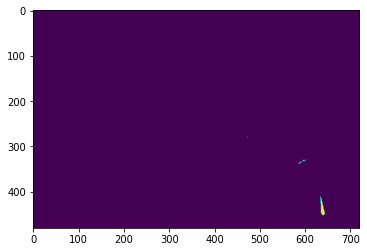

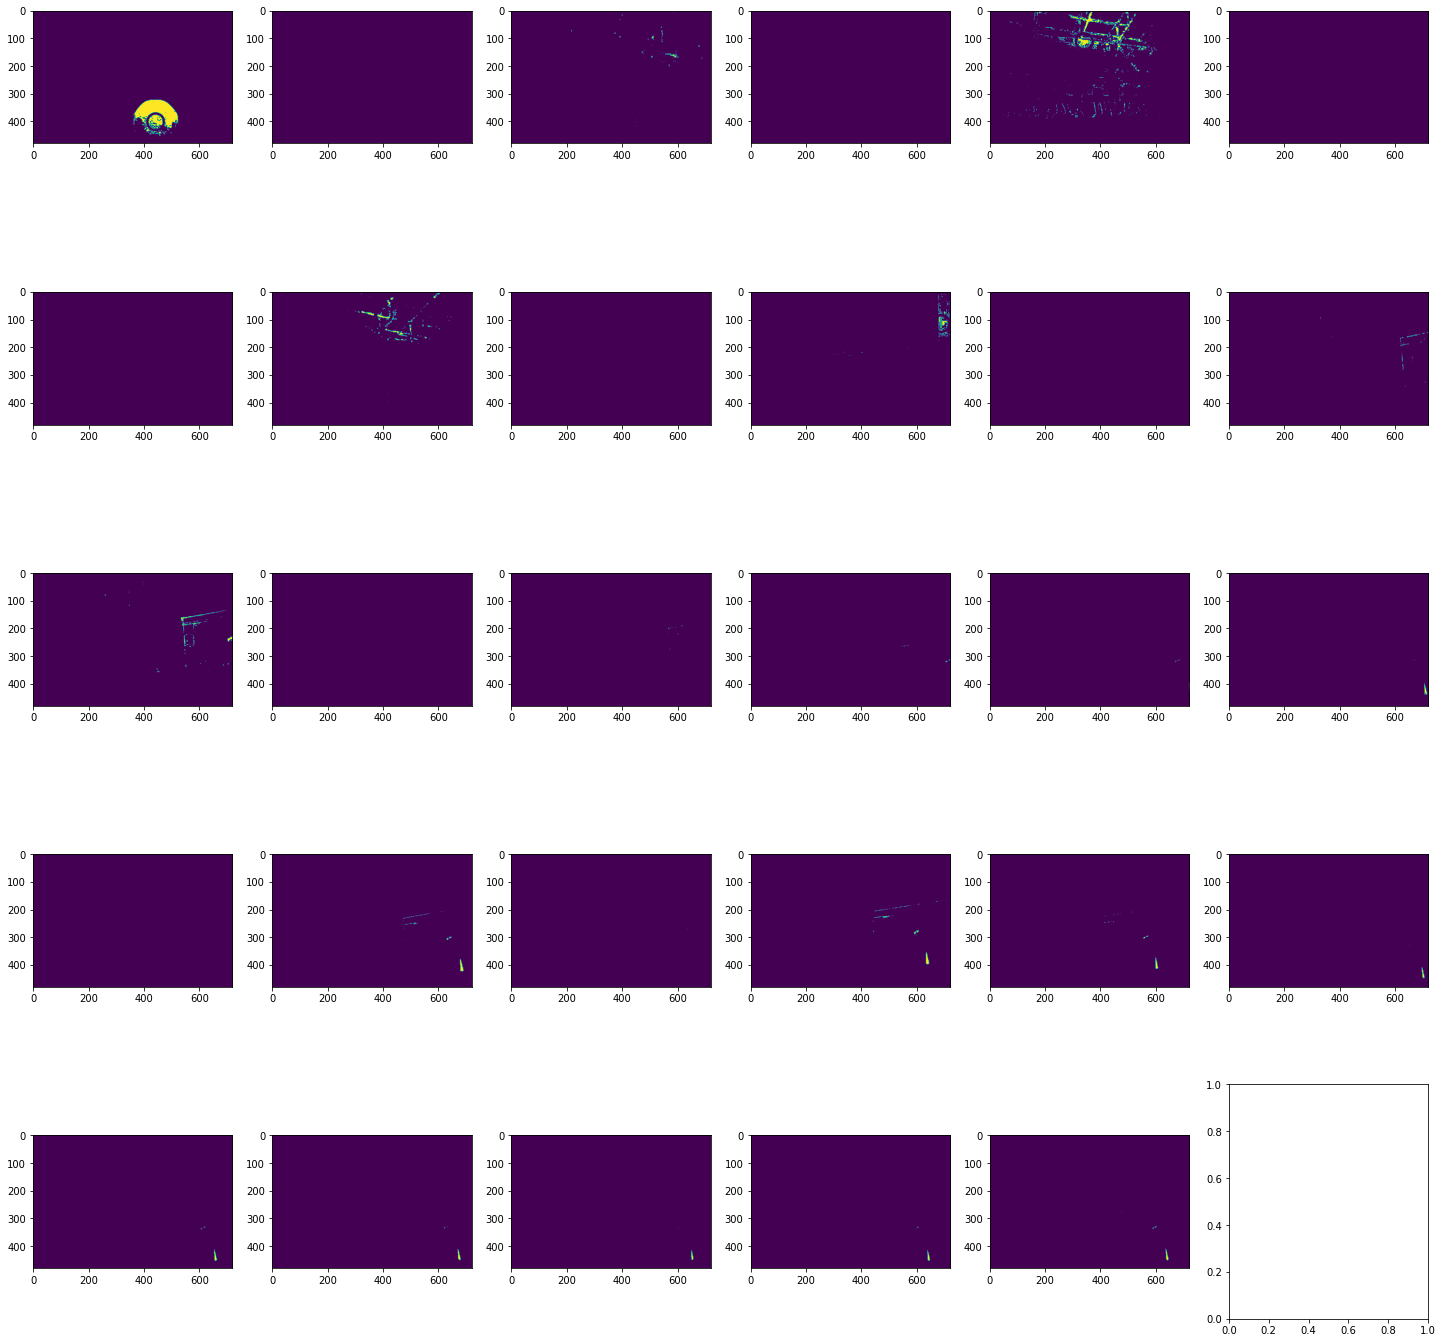

In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def get_mask(path):

    img = cv2.imread(path) # 画像を読み込む

    height, width = img.shape[:2] # 画像のサイズを取得する

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # 色基準で2値化する

    # 色の範囲を指定する
    hsv_min = np.array([0,145,0])
    hsv_max = np.array([5,255,255])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    # 赤色のHSVの値域2
    hsv_min = np.array([160,110,0]) #カメラ故障のため，0→150へ変更
    hsv_max = np.array([190,255,255])
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)

    # 指定した色に基づいたマスク画像の生成
    # mask1 = cv2.inRange(hsv, lower_color1, upper_color1)
    mask = mask1 +  mask2

    return mask

mask = get_mask("/Users/k.sakamoto/Desktop/投下1回目_log/img/image028.jpg") #一番コーンが綺麗に写ってる
plt.imshow(mask)

n = 9
fig, ax = plt.subplots(5, 6, figsize=(25,25)) #nを変えて写真の枚数に合わせる。今回は9*9=81枚

ax = ax.ravel()
for i, a in enumerate(ax):
    a.imshow(get_mask("/Users/k.sakamoto/Desktop/投下1回目_log/img/image{:>03d}.jpg".format(i))) #いっぱい写真が入っているフォルダ
plt.show()